In [ ]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=1
import matplotlib.pyplot as plt
from utils.utils import get_path, filter_dtm_dists 
from utils.io_utils import load_multiple_res
from utils.pd_utils import get_outlier_scores_best_auc, filter_dgms
from utils.fig_utils import plot_many_dists
import os
import numpy as np

In [3]:
style_file = "utils.style"
plt.style.use(style_file)

In [4]:
root_path = get_path("data")
fig_path = os.path.join(root_path, "figures")

# Figs with many methods on toy data

In [5]:
distances = {
    "euclidean": [{}],
    "fermat": [
               {"p": 2},
               {"p": 3},
               {"p": 5},
               {"p": 7}
               ],
    "dtm" : [
            {"k": 4, "p_dtm": 2, "p_radius": 1},
            {"k": 4, "p_dtm": np.inf, "p_radius": 1},
            {"k": 15, "p_dtm": 2, "p_radius": 1},
            {"k": 15, "p_dtm": np.inf, "p_radius": 1},
            {"k": 100, "p_dtm": 2, "p_radius": 1},
            {"k": 100, "p_dtm": np.inf, "p_radius": 1},

            {"k": 4, "p_dtm": 2, "p_radius": 2},
            {"k": 4, "p_dtm": np.inf, "p_radius": 2},
            {"k": 15, "p_dtm": 2, "p_radius": 2},
            {"k": 15, "p_dtm": np.inf, "p_radius": 2},
            {"k": 100, "p_dtm": 2, "p_radius": 2}, 
            {"k": 100, "p_dtm": np.inf, "p_radius": 2},

            {"k": 4, "p_dtm": 2, "p_radius": np.inf},
            {"k": 4, "p_dtm": np.inf, "p_radius": np.inf}, 
            {"k": 15, "p_dtm": 2, "p_radius": np.inf},
            {"k": 15, "p_dtm": np.inf, "p_radius": np.inf},
            {"k": 100, "p_dtm": 2, "p_radius": np.inf},
            {"k": 100, "p_dtm": np.inf, "p_radius": np.inf},
    ],
    "core": [
        {"k": 15},
        {"k": 100}
    ],
    "sknn_dist": [
        {"k": 15},
        {"k": 100}
    ],
    "tsne": [
         {"perplexity": 30},
         {"perplexity": 200},
         {"perplexity": 333}
    ],
    "umap": [
         {"k": 100, "use_rho": True, "include_self": True},
         {"k": 999, "use_rho": True, "include_self": True},
    ],
    "tsne_embd": [
        {"perplexity": 8, "n_epochs": 500, "n_early_epochs": 250, "rescale_tsne": True},
        {"perplexity": 30, "n_epochs": 500, "n_early_epochs": 250, "rescale_tsne": True},
        {"perplexity": 333, "n_epochs": 500, "n_early_epochs": 250, "rescale_tsne": True}
    ],
    "umap_embd": [
        {"k": 15, "n_epochs": 750, "min_dist": 0.1, "metric": "euclidean"},
        {"k": 100, "n_epochs": 750, "min_dist": 0.1, "metric": "euclidean"},
        {"k": 999, "n_epochs": 750, "min_dist": 0.1, "metric": "euclidean"},
    ],
    "eff_res": [
        {"corrected": True, "weighted": False, "k": 15, "disconnect": True},
        {"corrected": True, "weighted": False, "k": 100, "disconnect": True,}
    ],
    "diffusion": [
        {"k": 15, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 100, "t": 8, "kernel": "sknn", "include_self": False},
        {"k": 15, "t": 64, "kernel": "sknn", "include_self": False},
        {"k": 100, "t": 64, "kernel": "sknn", "include_self": False},
    ],
    "spectral": [
        {"k": 15, "normalization": "none", "n_evecs": 2, "weighted": False},
        {"k": 15, "normalization": "none", "n_evecs": 5, "weighted": False},
        {"k": 15, "normalization": "none", "n_evecs": 10, "weighted": False},
    ],
}

n = 1000
sigmas = np.linspace(0.0, 0.4, 33)[:-4]
sigmas = np.array([np.format_float_positional(sigma, precision=4, unique=True, trim='0') for sigma in sigmas]).astype(float)
seeds = [0, 1, 2]

## Circle

In [6]:
dataset = "toy_circle"

### d = 50

In [6]:
# load PH results
embd_dim = 50
all_res = load_multiple_res(datasets=dataset, distances=distances, root_path=root_path, n=n, embd_dims=embd_dim, sigmas=sigmas, seeds=seeds, n_threads=10)

Done with toy_circle 50 euclidean n_outliers=0
Done with toy_circle 50 fermat_p_2 n_outliers=0
Done with toy_circle 50 fermat_p_3 n_outliers=0
Done with toy_circle 50 fermat_p_5 n_outliers=0
Done with toy_circle 50 fermat_p_7 n_outliers=0
Done with toy_circle 50 dtm_k_4_p_dtm_2_p_radius_1 n_outliers=0
Done with toy_circle 50 dtm_k_4_p_dtm_inf_p_radius_1 n_outliers=0
Done with toy_circle 50 dtm_k_15_p_dtm_2_p_radius_1 n_outliers=0
Done with toy_circle 50 dtm_k_15_p_dtm_inf_p_radius_1 n_outliers=0
Done with toy_circle 50 dtm_k_100_p_dtm_2_p_radius_1 n_outliers=0
Done with toy_circle 50 dtm_k_100_p_dtm_inf_p_radius_1 n_outliers=0
Done with toy_circle 50 dtm_k_4_p_dtm_2_p_radius_2 n_outliers=0
Done with toy_circle 50 dtm_k_4_p_dtm_inf_p_radius_2 n_outliers=0
Done with toy_circle 50 dtm_k_15_p_dtm_2_p_radius_2 n_outliers=0
Done with toy_circle 50 dtm_k_15_p_dtm_inf_p_radius_2 n_outliers=0
Done with toy_circle 50 dtm_k_100_p_dtm_2_p_radius_2 n_outliers=0
Done with toy_circle 50 dtm_k_100_p_d

In [7]:
# filtering 
dob = 1.25
all_res = filter_dgms(all_res, dim=1, dob=dob, binary=True)

In [8]:
# compute outlier scores
outlier_scores, best_aucs = get_outlier_scores_best_auc(all_res, dim=1, n_features=1)

In [10]:
# only keep the dtm runs with the best auc for each p_radius
filter_dtm_dists(outlier_scores)

dict_keys(['dtm_k_4_p_dtm_2_p_radius_1', 'dtm_k_4_p_dtm_2_p_radius_2', 'dtm_k_4_p_dtm_2_p_radius_inf'])


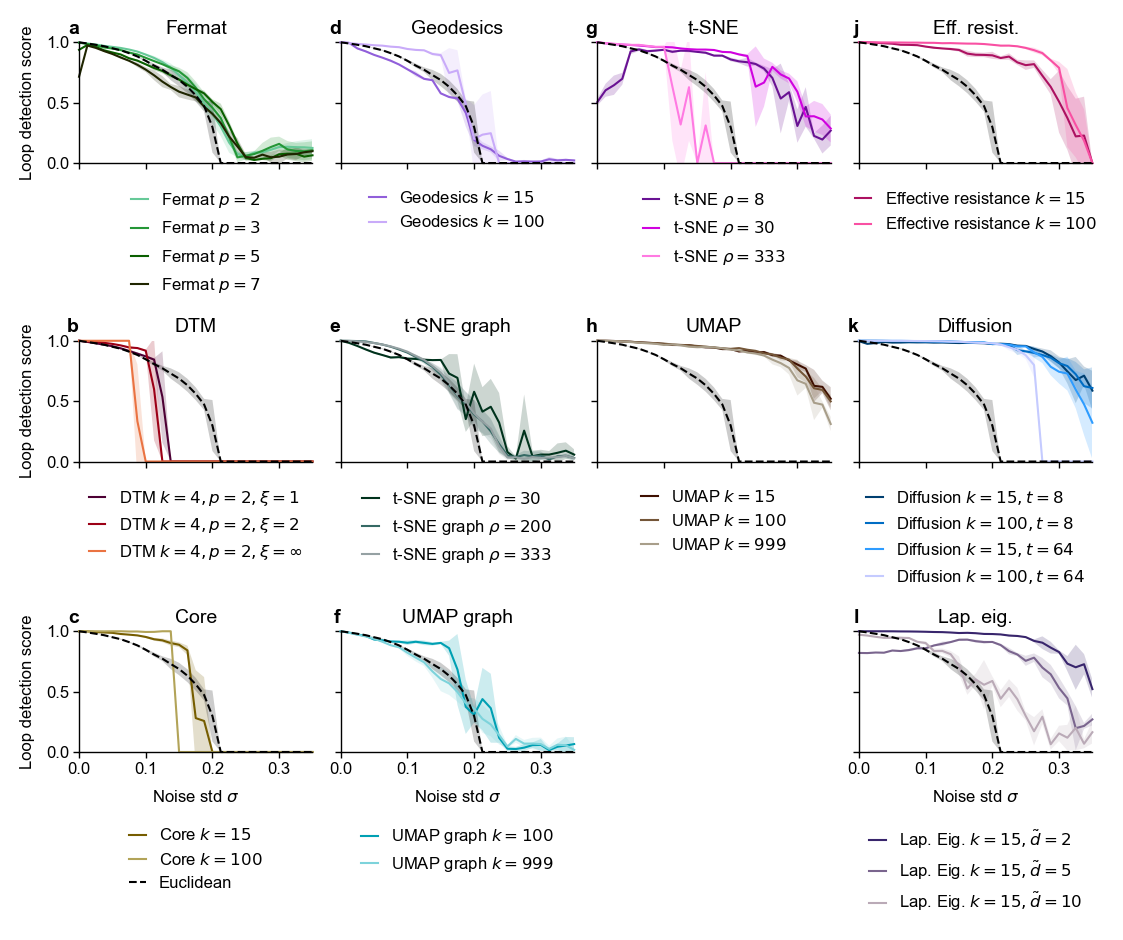

In [11]:
plot_many_dists(outlier_scores=outlier_scores, sigmas=sigmas, ylabel="Loop detection score", fig_path=fig_path, fig_title=f"fig_{dataset}_{embd_dim}_many_dob.pdf")

### d=2

In [12]:
embd_dim = 2
distances["sknn_dist"] = [{"k": 100}]  # k=15 gave convergence issues with the shortest path solver
all_res = load_multiple_res(datasets=dataset, distances=distances, root_path=root_path, n=n, embd_dims=embd_dim, sigmas=sigmas, seeds=seeds, n_threads=10)

Done with toy_circle 2 euclidean n_outliers=0
Done with toy_circle 2 fermat_p_2 n_outliers=0
Done with toy_circle 2 fermat_p_3 n_outliers=0
Done with toy_circle 2 fermat_p_5 n_outliers=0
Done with toy_circle 2 fermat_p_7 n_outliers=0
Done with toy_circle 2 dtm_k_4_p_dtm_2_p_radius_1 n_outliers=0
Done with toy_circle 2 dtm_k_4_p_dtm_inf_p_radius_1 n_outliers=0
Done with toy_circle 2 dtm_k_15_p_dtm_2_p_radius_1 n_outliers=0
Done with toy_circle 2 dtm_k_15_p_dtm_inf_p_radius_1 n_outliers=0
Done with toy_circle 2 dtm_k_100_p_dtm_2_p_radius_1 n_outliers=0
Done with toy_circle 2 dtm_k_100_p_dtm_inf_p_radius_1 n_outliers=0
Done with toy_circle 2 dtm_k_4_p_dtm_2_p_radius_2 n_outliers=0
Done with toy_circle 2 dtm_k_4_p_dtm_inf_p_radius_2 n_outliers=0
Done with toy_circle 2 dtm_k_15_p_dtm_2_p_radius_2 n_outliers=0
Done with toy_circle 2 dtm_k_15_p_dtm_inf_p_radius_2 n_outliers=0
Done with toy_circle 2 dtm_k_100_p_dtm_2_p_radius_2 n_outliers=0
Done with toy_circle 2 dtm_k_100_p_dtm_inf_p_radius_2

In [13]:
# filtering 
dob = 1.25
all_res = filter_dgms(all_res, dim=1, dob=dob, binary=True)

In [14]:
# compute outlier scores
outlier_scores, best_aucs = get_outlier_scores_best_auc(all_res, dim=1, n_features=1)

In [15]:
# delete all but the best run for dtm for each p_radius
filter_dtm_dists(outlier_scores)

dict_keys(['dtm_k_100_p_dtm_inf_p_radius_1', 'dtm_k_100_p_dtm_inf_p_radius_2', 'dtm_k_15_p_dtm_inf_p_radius_inf'])


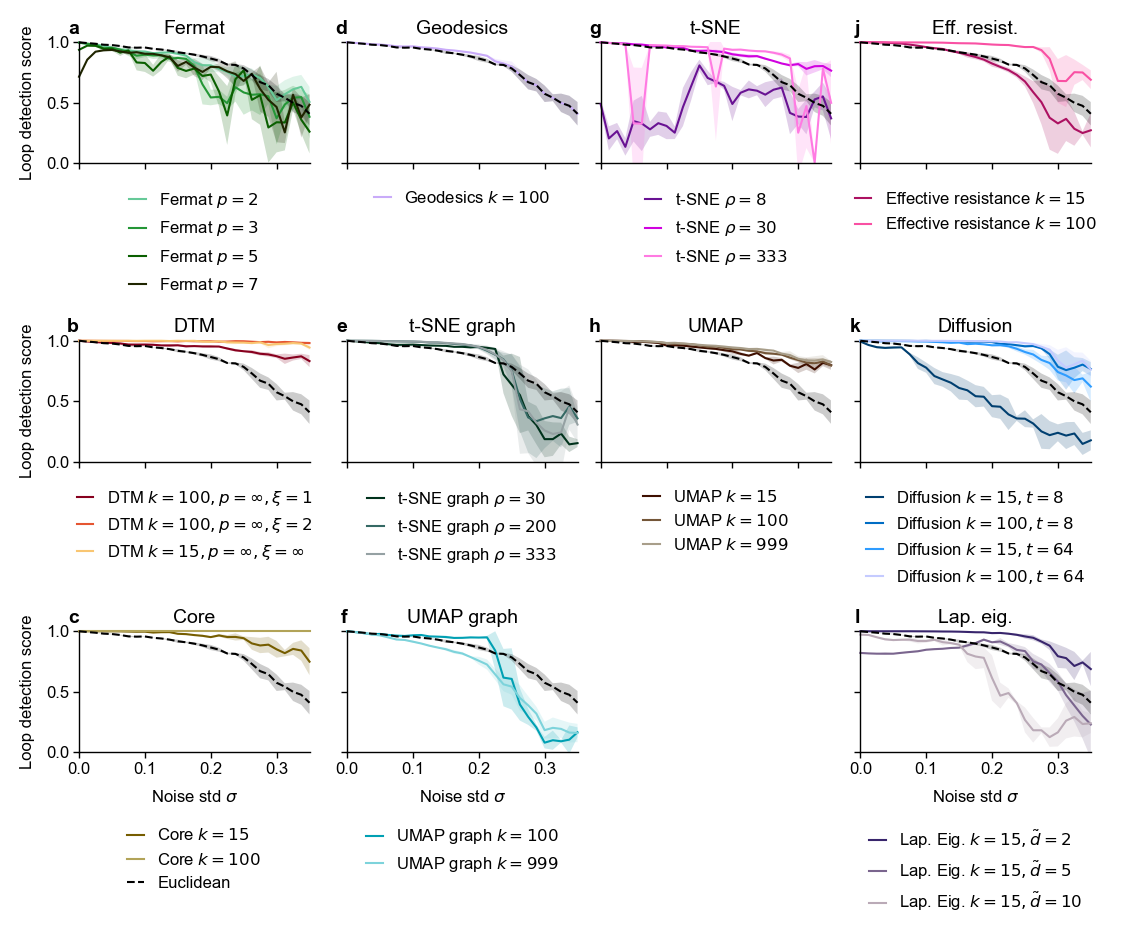

In [16]:
plot_many_dists(outlier_scores=outlier_scores, sigmas=sigmas, ylabel="Loop detection score", fig_path=fig_path, fig_title=f"fig_{dataset}_{embd_dim}_many_dob.pdf")

In [ ]:
distances["sknn_dist"] = [{"k": 15}, {"k": 100}]  # adding  back k=15

### d=50 no filtering

In [7]:
embd_dim = 50
all_res = load_multiple_res(datasets=dataset, distances=distances, root_path=root_path, n=n, embd_dims=embd_dim, sigmas=sigmas, seeds=seeds, n_threads=10)

Done with toy_circle 50 euclidean n_outliers=0
Done with toy_circle 50 fermat_p_2 n_outliers=0
Done with toy_circle 50 fermat_p_3 n_outliers=0
Done with toy_circle 50 fermat_p_5 n_outliers=0
Done with toy_circle 50 fermat_p_7 n_outliers=0
Done with toy_circle 50 dtm_k_4_p_dtm_2_p_radius_1 n_outliers=0
Done with toy_circle 50 dtm_k_4_p_dtm_inf_p_radius_1 n_outliers=0
Done with toy_circle 50 dtm_k_15_p_dtm_2_p_radius_1 n_outliers=0
Done with toy_circle 50 dtm_k_15_p_dtm_inf_p_radius_1 n_outliers=0
Done with toy_circle 50 dtm_k_100_p_dtm_2_p_radius_1 n_outliers=0
Done with toy_circle 50 dtm_k_100_p_dtm_inf_p_radius_1 n_outliers=0
Done with toy_circle 50 dtm_k_4_p_dtm_2_p_radius_2 n_outliers=0
Done with toy_circle 50 dtm_k_4_p_dtm_inf_p_radius_2 n_outliers=0
Done with toy_circle 50 dtm_k_15_p_dtm_2_p_radius_2 n_outliers=0
Done with toy_circle 50 dtm_k_15_p_dtm_inf_p_radius_2 n_outliers=0
Done with toy_circle 50 dtm_k_100_p_dtm_2_p_radius_2 n_outliers=0
Done with toy_circle 50 dtm_k_100_p_d

In [8]:
# compute outlier scores
outlier_scores, best_aucs = get_outlier_scores_best_auc(all_res, dim=1, n_features=1)

In [9]:
# delete all but the best run for dtm for each p_radius
filter_dtm_dists(outlier_scores)

dict_keys(['dtm_k_100_p_dtm_2_p_radius_1', 'dtm_k_100_p_dtm_2_p_radius_2', 'dtm_k_4_p_dtm_inf_p_radius_inf'])


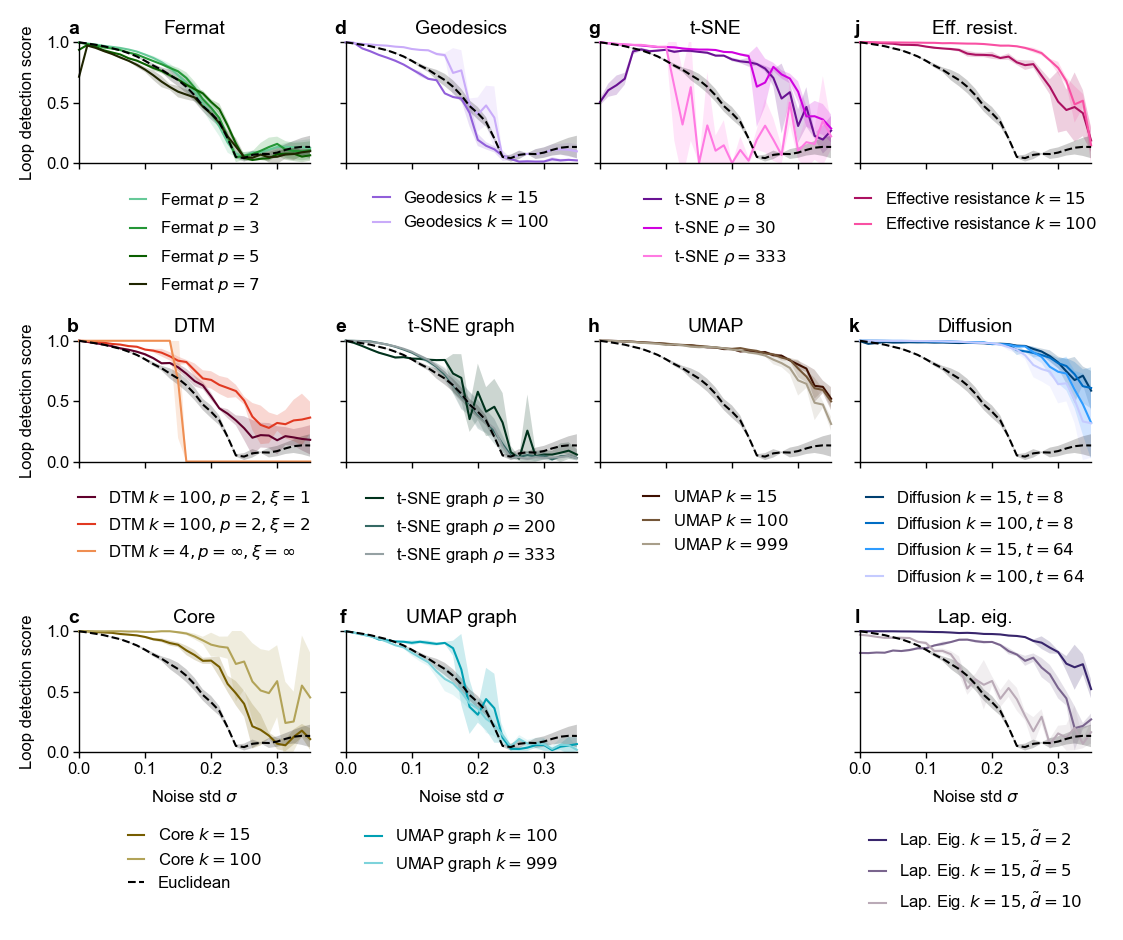

In [10]:
plot_many_dists(outlier_scores=outlier_scores, sigmas=sigmas, ylabel="Loop detection score", fig_path=fig_path, fig_title=f"fig_{dataset}_{embd_dim}_many.pdf")

# Eyeglasses

In [11]:
dataset = "eyeglasses"
embd_dim = 50
all_res = load_multiple_res(datasets=dataset, distances=distances, root_path=root_path, n=n, embd_dims=embd_dim, sigmas=sigmas[:13], seeds=seeds, n_threads=10)

Done with eyeglasses 50 euclidean n_outliers=0
Done with eyeglasses 50 fermat_p_2 n_outliers=0
Done with eyeglasses 50 fermat_p_3 n_outliers=0
Done with eyeglasses 50 fermat_p_5 n_outliers=0
Done with eyeglasses 50 fermat_p_7 n_outliers=0
Done with eyeglasses 50 dtm_k_4_p_dtm_2_p_radius_1 n_outliers=0
Done with eyeglasses 50 dtm_k_4_p_dtm_inf_p_radius_1 n_outliers=0
Done with eyeglasses 50 dtm_k_15_p_dtm_2_p_radius_1 n_outliers=0
Done with eyeglasses 50 dtm_k_15_p_dtm_inf_p_radius_1 n_outliers=0
Done with eyeglasses 50 dtm_k_100_p_dtm_2_p_radius_1 n_outliers=0
Done with eyeglasses 50 dtm_k_100_p_dtm_inf_p_radius_1 n_outliers=0
Done with eyeglasses 50 dtm_k_4_p_dtm_2_p_radius_2 n_outliers=0
Done with eyeglasses 50 dtm_k_4_p_dtm_inf_p_radius_2 n_outliers=0
Done with eyeglasses 50 dtm_k_15_p_dtm_2_p_radius_2 n_outliers=0
Done with eyeglasses 50 dtm_k_15_p_dtm_inf_p_radius_2 n_outliers=0
Done with eyeglasses 50 dtm_k_100_p_dtm_2_p_radius_2 n_outliers=0
Done with eyeglasses 50 dtm_k_100_p_d

In [12]:
# filtering 
dob = 1.25
all_res = filter_dgms(all_res, dim=1, dob=dob, binary=True)

In [13]:
# compute outlier scores
outlier_scores, best_aucs = get_outlier_scores_best_auc(all_res, dim=1, n_features=1)

In [14]:
# delete all but the best run for dtm for each p_radius
filter_dtm_dists(outlier_scores)

dict_keys(['dtm_k_100_p_dtm_2_p_radius_1', 'dtm_k_15_p_dtm_2_p_radius_2', 'dtm_k_4_p_dtm_2_p_radius_inf'])


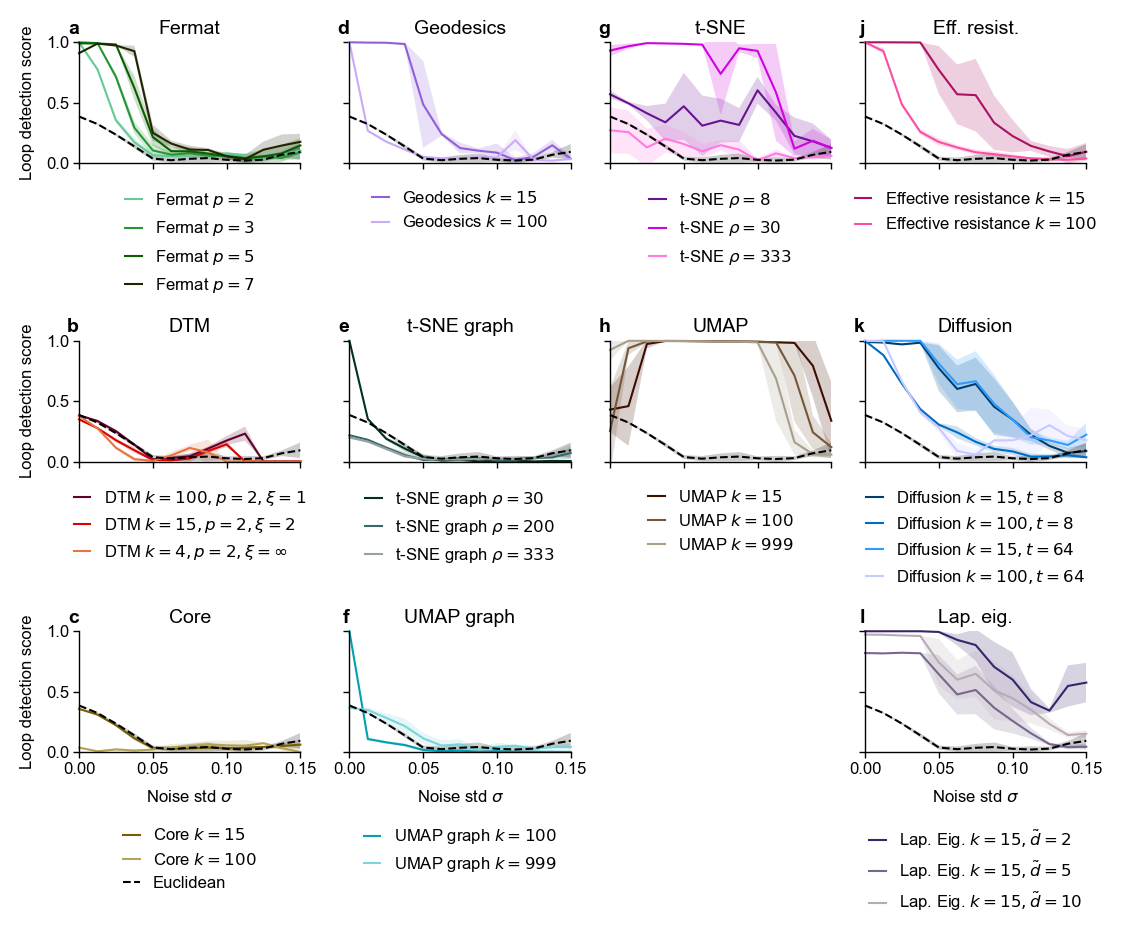

In [15]:
plot_many_dists(outlier_scores=outlier_scores, sigmas=sigmas[:13], ylabel="Loop detection score", fig_path=fig_path, fig_title=f"fig_{dataset}_{embd_dim}_many_dob.pdf")

# Linked circles

In [16]:
dataset = "inter_circles"
embd_dim = 50
all_res = load_multiple_res(datasets=dataset, distances=distances, root_path=root_path, n=n, embd_dims=embd_dim, sigmas=sigmas, seeds=seeds, n_threads=10)

Done with inter_circles 50 euclidean n_outliers=0
Done with inter_circles 50 fermat_p_2 n_outliers=0
Done with inter_circles 50 fermat_p_3 n_outliers=0
Done with inter_circles 50 fermat_p_5 n_outliers=0
Done with inter_circles 50 fermat_p_7 n_outliers=0
Done with inter_circles 50 dtm_k_4_p_dtm_2_p_radius_1 n_outliers=0
Done with inter_circles 50 dtm_k_4_p_dtm_inf_p_radius_1 n_outliers=0
Done with inter_circles 50 dtm_k_15_p_dtm_2_p_radius_1 n_outliers=0
Done with inter_circles 50 dtm_k_15_p_dtm_inf_p_radius_1 n_outliers=0
Done with inter_circles 50 dtm_k_100_p_dtm_2_p_radius_1 n_outliers=0
Done with inter_circles 50 dtm_k_100_p_dtm_inf_p_radius_1 n_outliers=0
Done with inter_circles 50 dtm_k_4_p_dtm_2_p_radius_2 n_outliers=0
Done with inter_circles 50 dtm_k_4_p_dtm_inf_p_radius_2 n_outliers=0
Done with inter_circles 50 dtm_k_15_p_dtm_2_p_radius_2 n_outliers=0
Done with inter_circles 50 dtm_k_15_p_dtm_inf_p_radius_2 n_outliers=0
Done with inter_circles 50 dtm_k_100_p_dtm_2_p_radius_2 n_

In [17]:
# filtering 
dob = 1.25
all_res = filter_dgms(all_res, dim=1, dob=dob, binary=True)

In [18]:
# compute outlier scores
outlier_scores, best_aucs = get_outlier_scores_best_auc(all_res, dim=1, n_features=2)

In [19]:
# delete all but the best run for dtm for each p_radius
filter_dtm_dists(outlier_scores)

dict_keys(['dtm_k_15_p_dtm_inf_p_radius_1', 'dtm_k_15_p_dtm_inf_p_radius_2', 'dtm_k_15_p_dtm_2_p_radius_inf'])


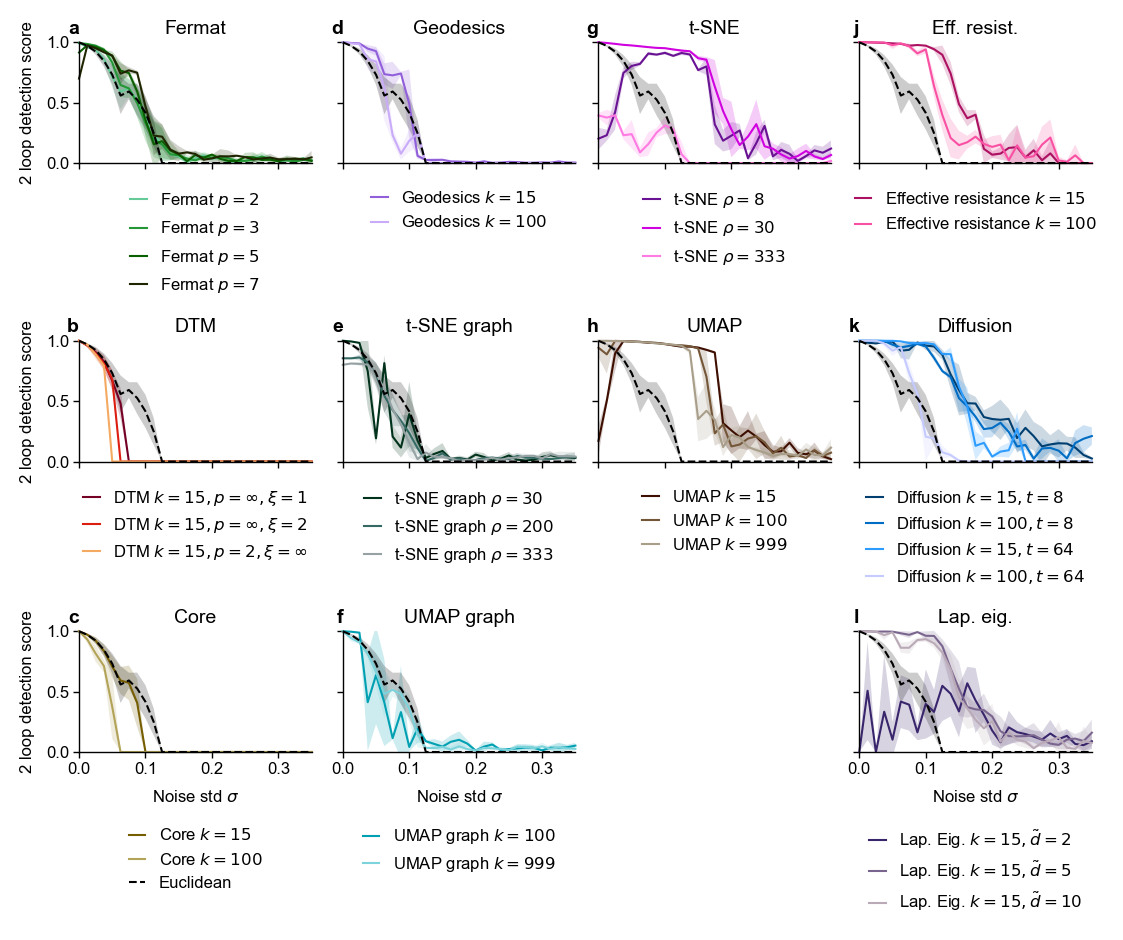

In [20]:
plot_many_dists(outlier_scores=outlier_scores, sigmas=sigmas, ylabel="2 loop detection score", fig_path=fig_path, fig_title=f"fig_{dataset}_{embd_dim}_many_dob.pdf")

# Sphere

In [21]:
dataset = "toy_sphere"
embd_dim = 50
all_res = load_multiple_res(datasets=dataset, distances=distances, root_path=root_path, n=n, embd_dims=embd_dim, sigmas=sigmas, seeds=seeds, n_threads=10)

Done with toy_sphere 50 euclidean n_outliers=0
Done with toy_sphere 50 fermat_p_2 n_outliers=0
Done with toy_sphere 50 fermat_p_3 n_outliers=0
Done with toy_sphere 50 fermat_p_5 n_outliers=0
Done with toy_sphere 50 fermat_p_7 n_outliers=0
Done with toy_sphere 50 dtm_k_4_p_dtm_2_p_radius_1 n_outliers=0
Done with toy_sphere 50 dtm_k_4_p_dtm_inf_p_radius_1 n_outliers=0
Done with toy_sphere 50 dtm_k_15_p_dtm_2_p_radius_1 n_outliers=0
Done with toy_sphere 50 dtm_k_15_p_dtm_inf_p_radius_1 n_outliers=0
Done with toy_sphere 50 dtm_k_100_p_dtm_2_p_radius_1 n_outliers=0
Done with toy_sphere 50 dtm_k_100_p_dtm_inf_p_radius_1 n_outliers=0
Done with toy_sphere 50 dtm_k_4_p_dtm_2_p_radius_2 n_outliers=0
Done with toy_sphere 50 dtm_k_4_p_dtm_inf_p_radius_2 n_outliers=0
Done with toy_sphere 50 dtm_k_15_p_dtm_2_p_radius_2 n_outliers=0
Done with toy_sphere 50 dtm_k_15_p_dtm_inf_p_radius_2 n_outliers=0
Done with toy_sphere 50 dtm_k_100_p_dtm_2_p_radius_2 n_outliers=0
Done with toy_sphere 50 dtm_k_100_p_d

In [22]:
# filtering 
dob = 1.25
all_res = filter_dgms(all_res, dim=1, dob=dob, binary=True)
all_res = filter_dgms(all_res, dim=2, dob=dob, binary=True)

In [23]:
# compute outlier scores
outlier_scores_1, best_aucs_1 = get_outlier_scores_best_auc(all_res, dim=1, n_features=1)
outlier_scores_2, best_aucs_2 = get_outlier_scores_best_auc(all_res, dim=2, n_features=1)

In [24]:
# delete all but the best run for dtm for each p_radius
filter_dtm_dists(outlier_scores_1)
filter_dtm_dists(outlier_scores_2)

dict_keys(['dtm_k_15_p_dtm_inf_p_radius_1', 'dtm_k_15_p_dtm_inf_p_radius_2', 'dtm_k_4_p_dtm_inf_p_radius_inf'])
dict_keys(['dtm_k_4_p_dtm_2_p_radius_1', 'dtm_k_4_p_dtm_inf_p_radius_2', 'dtm_k_4_p_dtm_2_p_radius_inf'])


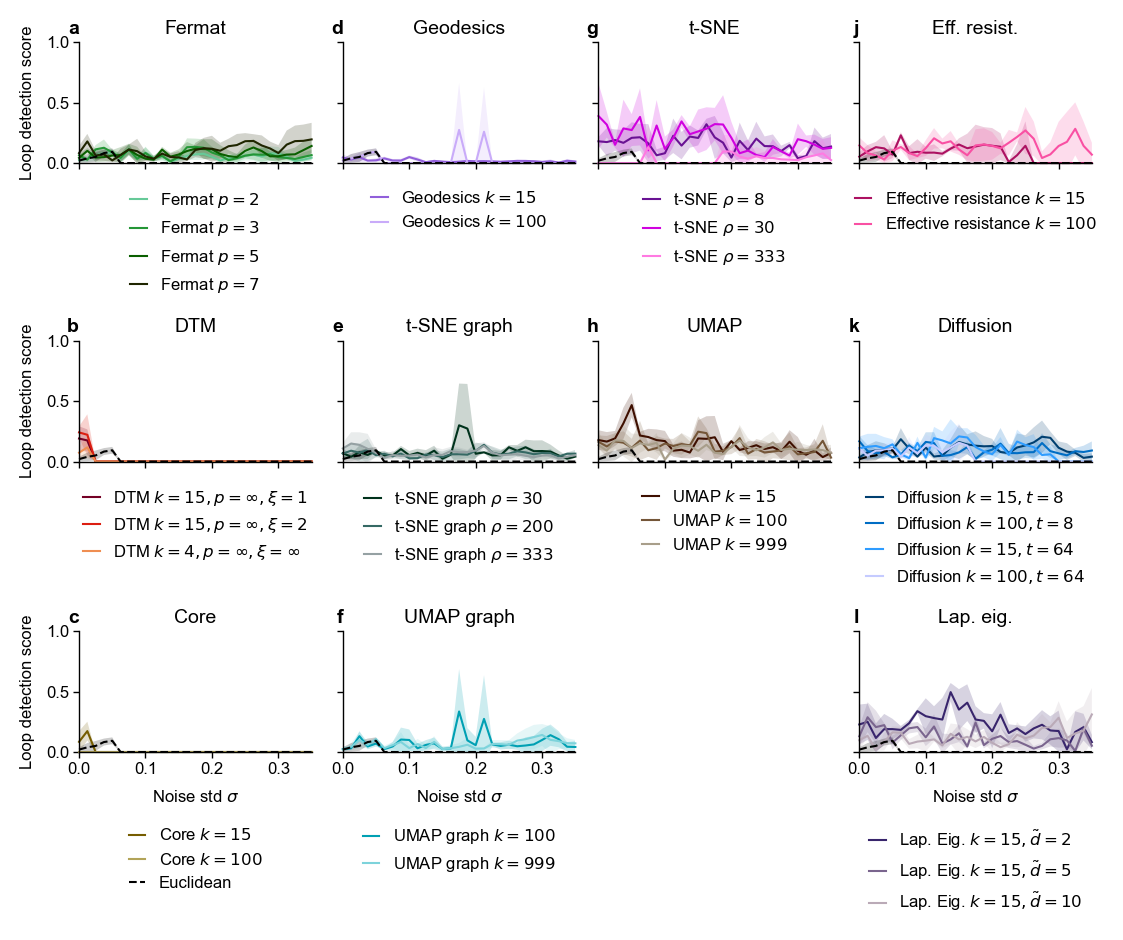

In [25]:
plot_many_dists(outlier_scores=outlier_scores_1, sigmas=sigmas, ylabel="Loop detection score", fig_path=fig_path, fig_title=f"fig_{dataset}_{embd_dim}_many_1D_dob.pdf")

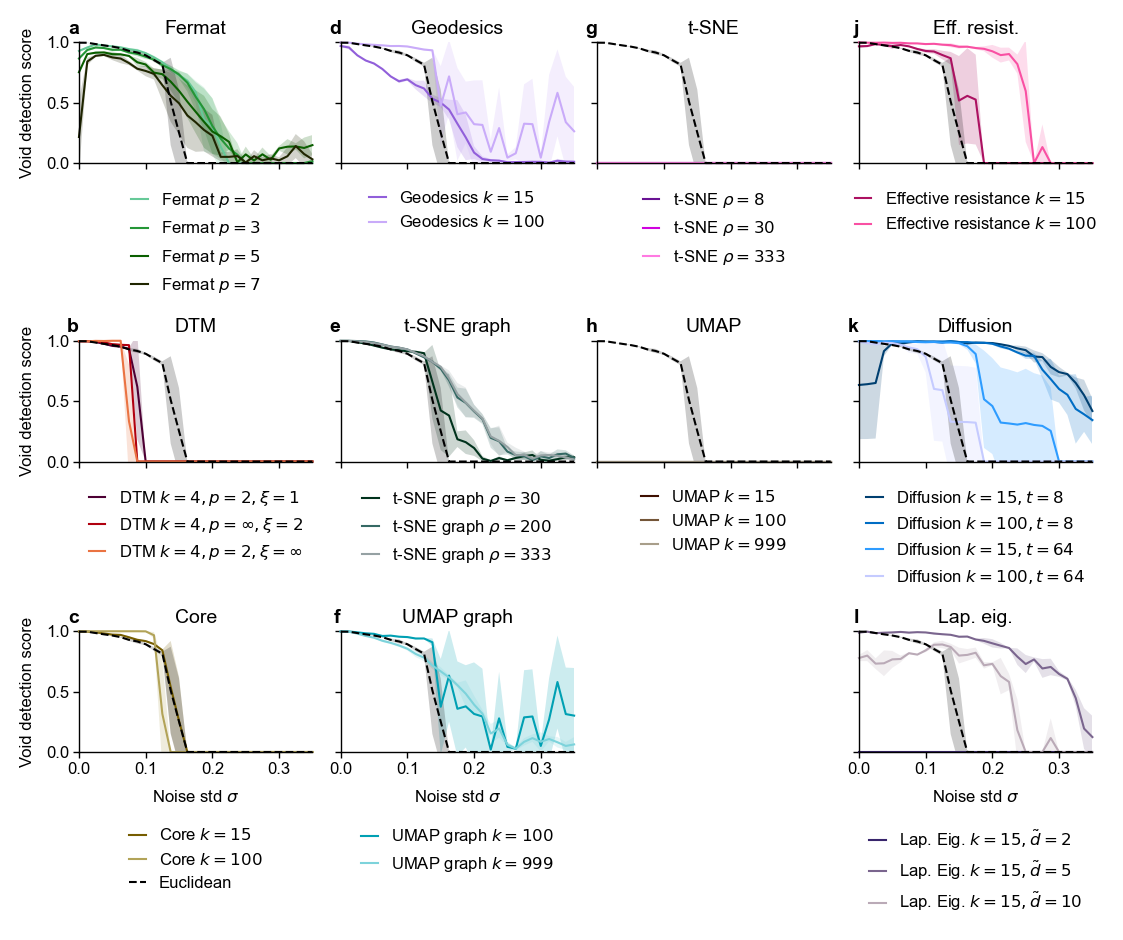

In [26]:
plot_many_dists(outlier_scores=outlier_scores_2, sigmas=sigmas, ylabel="Void detection score", fig_path=fig_path, fig_title=f"fig_{dataset}_{embd_dim}_many_2D_dob.pdf")

# Torus

In [42]:
dataset = "torus"
embd_dim = 50
all_res = load_multiple_res(datasets=dataset, distances=distances, root_path=root_path, n=n, embd_dims=embd_dim, sigmas=sigmas, seeds=seeds, n_threads=10)

Done with torus 50 euclidean n_outliers=0
Done with torus 50 fermat_p_2 n_outliers=0
Done with torus 50 fermat_p_3 n_outliers=0
Done with torus 50 fermat_p_5 n_outliers=0
Done with torus 50 fermat_p_7 n_outliers=0
Done with torus 50 dtm_k_4_p_dtm_2_p_radius_1 n_outliers=0
Done with torus 50 dtm_k_4_p_dtm_inf_p_radius_1 n_outliers=0
Done with torus 50 dtm_k_15_p_dtm_2_p_radius_1 n_outliers=0
Done with torus 50 dtm_k_15_p_dtm_inf_p_radius_1 n_outliers=0
Done with torus 50 dtm_k_100_p_dtm_2_p_radius_1 n_outliers=0
Done with torus 50 dtm_k_100_p_dtm_inf_p_radius_1 n_outliers=0
Done with torus 50 dtm_k_4_p_dtm_2_p_radius_2 n_outliers=0
Done with torus 50 dtm_k_4_p_dtm_inf_p_radius_2 n_outliers=0
Done with torus 50 dtm_k_15_p_dtm_2_p_radius_2 n_outliers=0
Done with torus 50 dtm_k_15_p_dtm_inf_p_radius_2 n_outliers=0
Done with torus 50 dtm_k_100_p_dtm_2_p_radius_2 n_outliers=0
Done with torus 50 dtm_k_100_p_dtm_inf_p_radius_2 n_outliers=0
Done with torus 50 dtm_k_4_p_dtm_2_p_radius_inf n_outl

In [43]:
# filtering 
dob = 1.25
all_res = filter_dgms(all_res, dim=1, dob=dob, binary=True)
all_res = filter_dgms(all_res, dim=2, dob=dob, binary=True)

In [44]:
# compute outlier scores
outlier_scores_1, best_aucs_1 = get_outlier_scores_best_auc(all_res, dim=1, n_features=2)
outlier_scores_2, best_aucs_2 = get_outlier_scores_best_auc(all_res, dim=2, n_features=1)

In [45]:
# delete all but the best run for dtm for each p_radius
filter_dtm_dists(outlier_scores_1)
filter_dtm_dists(outlier_scores_2)

dict_keys(['dtm_k_4_p_dtm_2_p_radius_1', 'dtm_k_4_p_dtm_2_p_radius_2', 'dtm_k_4_p_dtm_2_p_radius_inf'])
dict_keys(['dtm_k_4_p_dtm_2_p_radius_1', 'dtm_k_4_p_dtm_2_p_radius_2', 'dtm_k_4_p_dtm_2_p_radius_inf'])


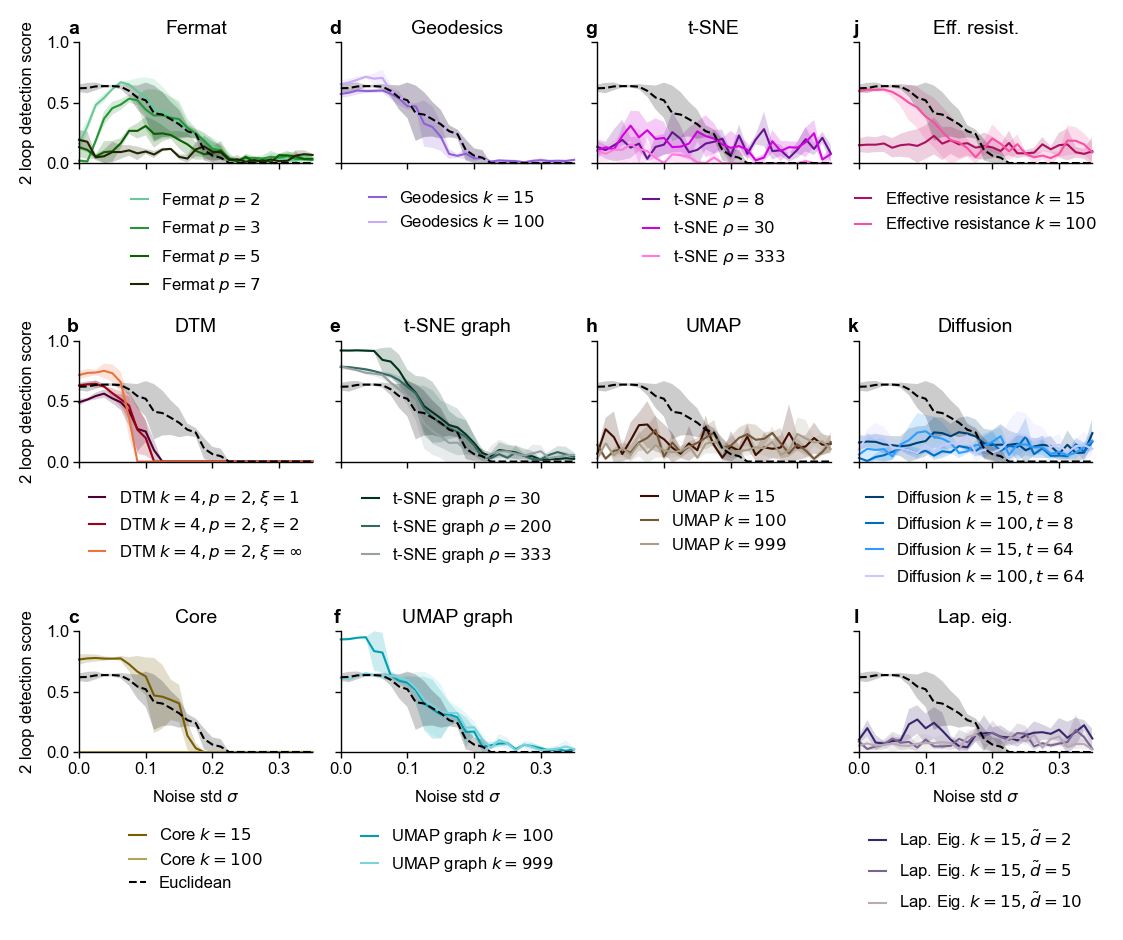

In [46]:
plot_many_dists(outlier_scores=outlier_scores_1, sigmas=sigmas, ylabel="2 loop detection score", fig_path=fig_path, fig_title=f"fig_{dataset}_{embd_dim}_many_1D_dob.pdf")

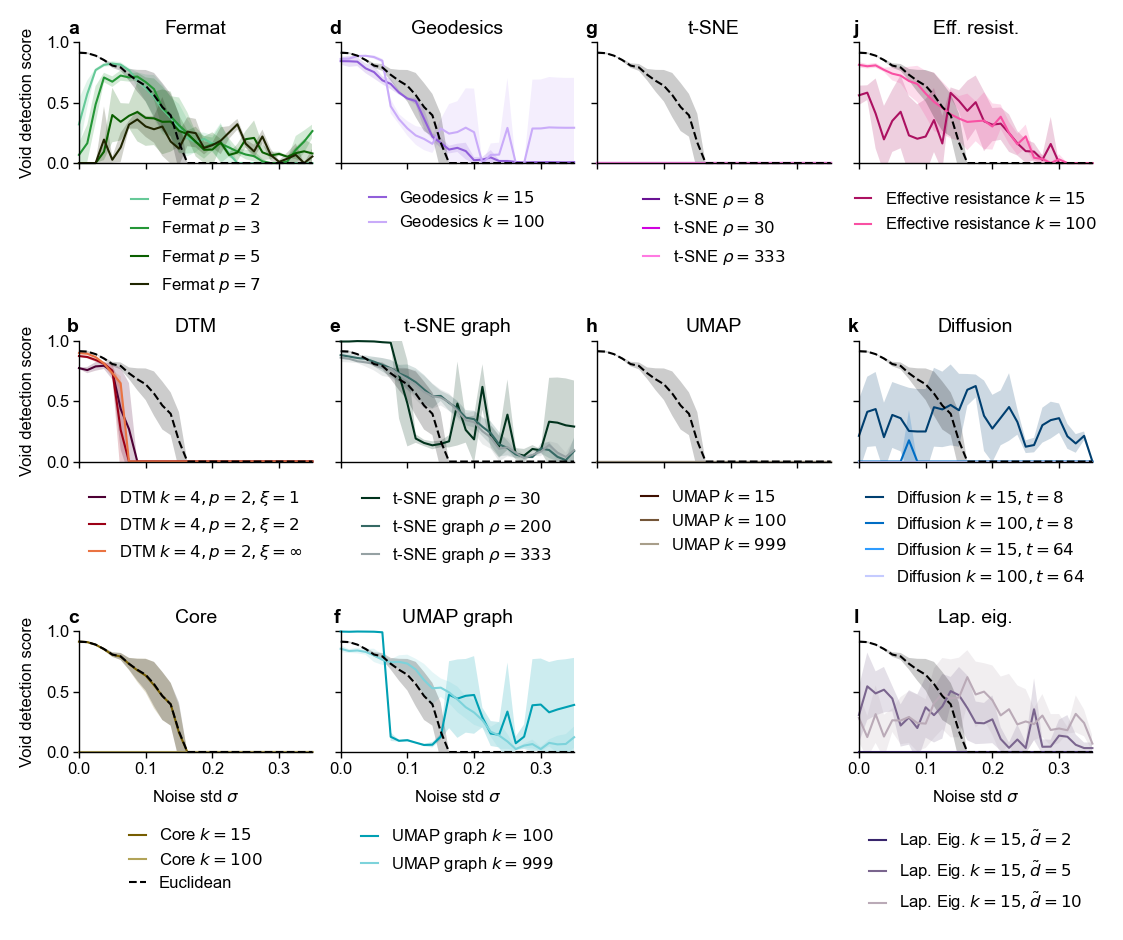

In [47]:
plot_many_dists(outlier_scores=outlier_scores_2, sigmas=sigmas, ylabel="Void detection score", fig_path=fig_path, fig_title=f"fig_{dataset}_{embd_dim}_many_2D_dob.pdf")